# Setup


In [167]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import pickle

In [168]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_image_color(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(21))
  plt.yticks([])
  thisplot = plt.bar(range(21), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plotImagesC(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()

def plotImages( images_arr, n_images=4):
  fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
      if img.ndim != 2:
          img = img.reshape( (150,150))
      ax.imshow( img, cmap="Greys_r")
      ax.set_xticks(())
      ax.set_yticks(())
  plt.tight_layout()

In [169]:
X_train = pickle.load(open('/content/drive/MyDrive/test data2/0 GRAY/X_train.pickle', 'rb'))
y_train = pickle.load(open('/content/drive/MyDrive/test data2/0 GRAY/y_train.pickle', 'rb'))
X_test = pickle.load(open('/content/drive/MyDrive/test data2/0 GRAY/X_test.pickle', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/test data2/0 GRAY/y_test.pickle', 'rb'))

In [170]:
X_trainC = pickle.load(open('/content/drive/MyDrive/test data2/0 COLOR/X_train.pickle', 'rb'))
y_trainC = pickle.load(open('/content/drive/MyDrive/test data2/0 COLOR/y_train.pickle', 'rb'))
X_testC = pickle.load(open('/content/drive/MyDrive/test data2/0 COLOR/X_test.pickle', 'rb'))
y_testC = pickle.load(open('/content/drive/MyDrive/test data2/0 COLOR/y_test.pickle', 'rb'))

In [171]:
class_names = ['1', '2', '4', '5', '7', '20','21', '22', 'ce',
               'circle','eac', 'electronic', 'fork', 'FSC', 'gulf_mark',
               'instructions', 'jap_paper', 'jap_plastic', 'tidyman',
               'triangle', 'triman']

In [172]:
#normalizing
X_train, X_test, X_trainC, X_testC = X_train/225, X_test/225, X_trainC/225, X_testC/225

# DNN black/white pics


In [173]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

In [174]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [175]:
model.fit(X_train_aug, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 1s 18ms/step - loss: 3.1285 - accuracy: 0.0486
Epoch 2/10
50/50 [==============================] - 1s 18ms/step - loss: 2.9715 - accuracy: 0.0919
Epoch 3/10
50/50 [==============================] - 1s 18ms/step - loss: 2.0040 - accuracy: 0.4353
Epoch 4/10
50/50 [==============================] - 1s 18ms/step - loss: 1.1186 - accuracy: 0.6774
Epoch 5/10
50/50 [==============================] - 1s 17ms/step - loss: 0.6872 - accuracy: 0.8054
Epoch 6/10
50/50 [==============================] - 1s 18ms/step - loss: 0.4114 - accuracy: 0.8832
Epoch 7/10
50/50 [==============================] - 1s 18ms/step - loss: 0.2012 - accuracy: 0.9518
Epoch 8/10
50/50 [==============================] - 1s 18ms/step - loss: 0.1527 - accuracy: 0.9546
Epoch 9/10
50/50 [==============================] - 1s 18ms/step - loss: 0.1808 - accuracy: 0.9467
Epoch 10/10
50/50 [==============================] - 1s 18ms/step - loss: 0.1861 - accuracy: 0.9580


In [176]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

13/13 - 0s - loss: 2.9509 - accuracy: 0.5200

Test accuracy: 0.5199999809265137


In [177]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
print('actual class: ',y_test[0], 'predicted class: ',np.argmax(predictions[0]))

actual class:  12 predicted class:  18


# DNN 2 with color image

In [195]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [196]:
def plotImagesC(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


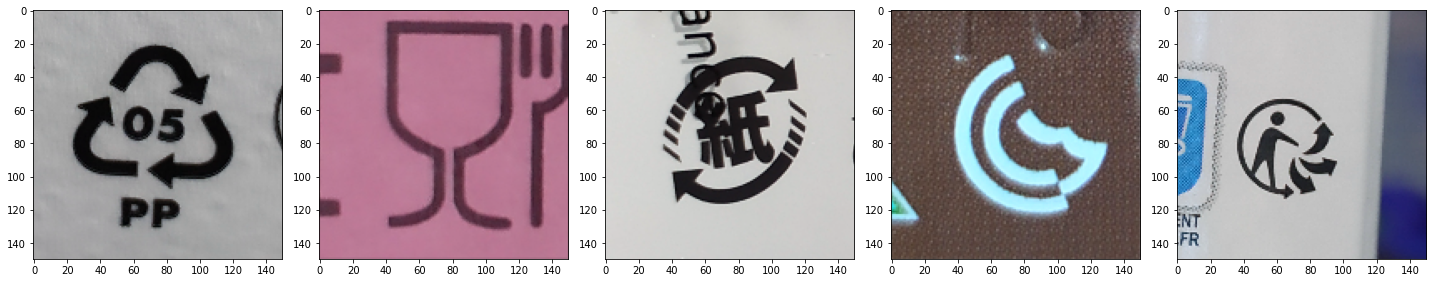

In [197]:
plotImagesC(X_trainC[:5])

In [198]:
#when I put Conv2D (3 layers, with curel sie (3,3) the accuracy drastically dropped

model_C = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

model_C.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [199]:
EPOCHS = 10
history = model_C.fit(
    X_trainC,y_trainC,
    steps_per_epoch=int(np.ceil(len(X_trainC) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_testC,y_testC),
    validation_steps=int(np.ceil(len(X_testC) / float(BATCH_SIZE)))
)

Epoch 1/10
16/16 [==============================] - 4s 207ms/step - loss: 3.5792 - accuracy: 0.0521 - val_loss: 3.0432 - val_accuracy: 0.0350
Epoch 2/10
16/16 [==============================] - 3s 193ms/step - loss: 3.0334 - accuracy: 0.0876 - val_loss: 2.9832 - val_accuracy: 0.1275
Epoch 3/10
16/16 [==============================] - 3s 195ms/step - loss: 2.7710 - accuracy: 0.2225 - val_loss: 2.4867 - val_accuracy: 0.2625
Epoch 4/10
16/16 [==============================] - 3s 195ms/step - loss: 1.9672 - accuracy: 0.4251 - val_loss: 2.1091 - val_accuracy: 0.4075
Epoch 5/10
16/16 [==============================] - 3s 196ms/step - loss: 1.2827 - accuracy: 0.6327 - val_loss: 2.0360 - val_accuracy: 0.4900
Epoch 6/10
16/16 [==============================] - 3s 195ms/step - loss: 0.7592 - accuracy: 0.7560 - val_loss: 1.9601 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 3s 196ms/step - loss: 0.5040 - accuracy: 0.8589 - val_loss: 2.1233 - val_accuracy: 0.5250
Epoch 

In [200]:
test_loss, test_acc = model_C.evaluate(X_testC,  y_testC, verbose=2)

print('\nTest accuracy:', test_acc)

13/13 - 0s - loss: 3.6629 - accuracy: 0.4850

Test accuracy: 0.48500001430511475


In [201]:
probability_model_C = tf.keras.Sequential([model_C, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model_C.predict(X_testC)
print('actual class: ',y_testC[0], 'predicted class: ',np.argmax(predictions[0]))

actual class:  0 predicted class:  3


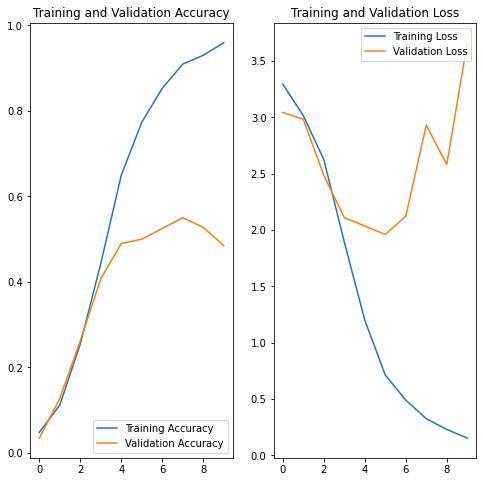

In [202]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# DNN black&white+drop out

In [203]:
model_bw_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

model_bw_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [204]:
EPOCHS = 100
BATCH_SIZE = 100  
IMG_SHAPE  = 150 

history = model_bw_dropout.fit(
    X_train,y_train,
    steps_per_epoch=int(np.ceil(len(X_train) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_test,y_test),
    validation_steps=int(np.ceil(len(X_test) / float(BATCH_SIZE)))
)

Epoch 1/100
16/16 [==============================] - 4s 223ms/step - loss: 3.0451 - accuracy: 0.0568 - val_loss: 3.0272 - val_accuracy: 0.0325
Epoch 2/100
16/16 [==============================] - 3s 212ms/step - loss: 2.9984 - accuracy: 0.0625 - val_loss: 2.8443 - val_accuracy: 0.1900
Epoch 3/100
16/16 [==============================] - 3s 214ms/step - loss: 2.5657 - accuracy: 0.2662 - val_loss: 2.0779 - val_accuracy: 0.4200
Epoch 4/100
16/16 [==============================] - 3s 214ms/step - loss: 1.7882 - accuracy: 0.4830 - val_loss: 1.6532 - val_accuracy: 0.5050
Epoch 5/100
16/16 [==============================] - 3s 215ms/step - loss: 1.3999 - accuracy: 0.5648 - val_loss: 1.4315 - val_accuracy: 0.5850
Epoch 6/100
16/16 [==============================] - 3s 215ms/step - loss: 1.0318 - accuracy: 0.6834 - val_loss: 1.3683 - val_accuracy: 0.5950
Epoch 7/100
16/16 [==============================] - 3s 216ms/step - loss: 0.8937 - accuracy: 0.7265 - val_loss: 1.4352 - val_accuracy: 0.6050

In [205]:
test_loss, test_acc = model_bw_dropout.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
#Test accuracy: 0.6875

13/13 - 0s - loss: 2.2973 - accuracy: 0.7350

Test accuracy: 0.7350000143051147


In [206]:
probability_model = tf.keras.Sequential([model_bw_dropout, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
print('actual class: ',y_test[0], 'predicted class: ',np.argmax(predictions[0]))

actual class:  12 predicted class:  12


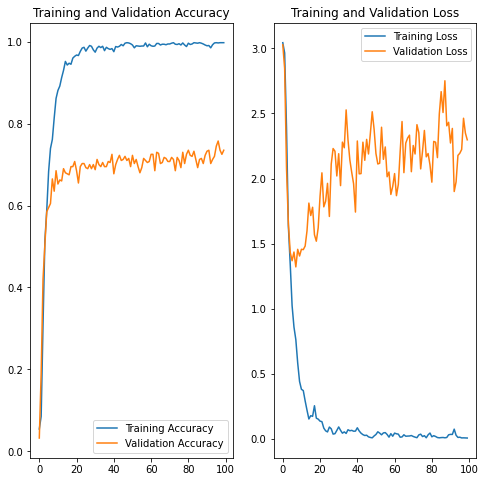

In [207]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# DNN color+drop out

In [208]:
model_aug_color_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

model_aug_color_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [209]:
EPOCHS = 100
BATCH_SIZE = 100  
IMG_SHAPE  = 150 

history = model_aug_color_dropout.fit(
    X_trainC,y_trainC,
    steps_per_epoch=int(np.ceil(len(X_trainC) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_testC,y_testC),
    validation_steps=int(np.ceil(len(X_testC) / float(BATCH_SIZE)))
)

Epoch 1/100
16/16 [==============================] - 4s 208ms/step - loss: 3.0524 - accuracy: 0.0565 - val_loss: 3.0377 - val_accuracy: 0.0575
Epoch 2/100
16/16 [==============================] - 3s 196ms/step - loss: 3.0146 - accuracy: 0.0988 - val_loss: 2.8527 - val_accuracy: 0.1950
Epoch 3/100
16/16 [==============================] - 3s 198ms/step - loss: 2.6748 - accuracy: 0.2218 - val_loss: 2.1254 - val_accuracy: 0.4025
Epoch 4/100
16/16 [==============================] - 3s 198ms/step - loss: 1.9443 - accuracy: 0.4198 - val_loss: 1.8176 - val_accuracy: 0.4650
Epoch 5/100
16/16 [==============================] - 3s 199ms/step - loss: 1.3914 - accuracy: 0.5860 - val_loss: 1.5480 - val_accuracy: 0.5450
Epoch 6/100
16/16 [==============================] - 3s 200ms/step - loss: 1.0860 - accuracy: 0.6899 - val_loss: 1.3337 - val_accuracy: 0.6150
Epoch 7/100
16/16 [==============================] - 3s 200ms/step - loss: 0.8356 - accuracy: 0.7522 - val_loss: 1.4102 - val_accuracy: 0.6175

In [210]:
test_loss, test_acc = model_aug_color_dropout.evaluate(X_testC,  y_testC, verbose=2)

print('\nTest accuracy:', test_acc, y_testC[0])
#previous test accuracy was: 0.6975

13/13 - 0s - loss: 2.5007 - accuracy: 0.7225

Test accuracy: 0.7225000262260437 0


In [213]:
model_aug_color = tf.keras.Sequential([model_aug_color_dropout, 
                                         tf.keras.layers.Softmax()])
predictions = model_aug_color.predict(X_testC)
print('actual class: ',y_testC[0], 'predicted class: ',np.argmax(predictions[0]))

actual class:  0 predicted class:  2


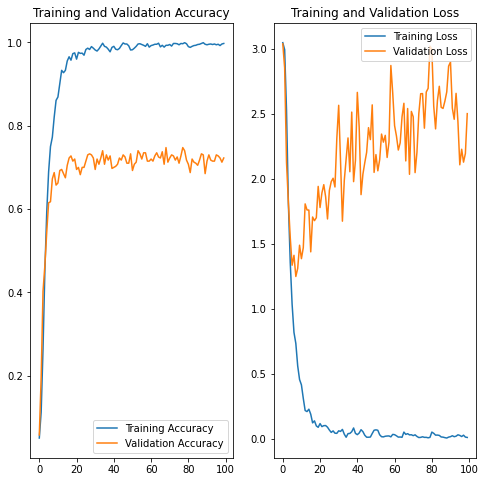

In [212]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

# DNN color+drop out+early stop

In [220]:
model_color_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

model_color_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [221]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 100
BATCH_SIZE = 100  
IMG_SHAPE  = 150 

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=20,restore_best_weights=True)

history = model_color_dropout.fit(
    X_trainC,y_trainC,
    steps_per_epoch=int(np.ceil(len(X_trainC) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_testC,y_testC),
    validation_steps=int(np.ceil(len(X_testC) / float(BATCH_SIZE))),
    callbacks=[earlystop_callback]
)

Epoch 1/100
16/16 [==============================] - 4s 228ms/step - loss: 3.0496 - accuracy: 0.0415 - val_loss: 3.0120 - val_accuracy: 0.1675
Epoch 2/100
16/16 [==============================] - 3s 197ms/step - loss: 2.9413 - accuracy: 0.1385 - val_loss: 2.4096 - val_accuracy: 0.3375
Epoch 3/100
16/16 [==============================] - 3s 200ms/step - loss: 2.1879 - accuracy: 0.3789 - val_loss: 1.7778 - val_accuracy: 0.4850
Epoch 4/100
16/16 [==============================] - 3s 199ms/step - loss: 1.5025 - accuracy: 0.5496 - val_loss: 1.6431 - val_accuracy: 0.5275
Epoch 5/100
16/16 [==============================] - 3s 201ms/step - loss: 1.3228 - accuracy: 0.6123 - val_loss: 1.5595 - val_accuracy: 0.5550
Epoch 6/100
16/16 [==============================] - 3s 201ms/step - loss: 0.9709 - accuracy: 0.6959 - val_loss: 1.4490 - val_accuracy: 0.6025
Epoch 7/100
16/16 [==============================] - 3s 200ms/step - loss: 0.7566 - accuracy: 0.7615 - val_loss: 1.7572 - val_accuracy: 0.5750

In [222]:
test_loss, test_acc = model_color_dropout.evaluate(X_testC,  y_testC, verbose=2)

print('\nTest accuracy:', test_acc, y_testC[0])
#100 epochs with aug and dropout + early stop(patience=20,restore_best_weights=True) gave 0.7100
#100 epochs with aug and dropout + early stop(patience=20,restore_best_weights=True) + normalized data gave 0.7375

13/13 - 0s - loss: 2.4698 - accuracy: 0.7225

Test accuracy: 0.7225000262260437 0


In [223]:
model_color_dropout_result = tf.keras.Sequential([model_color_dropout, 
                                         tf.keras.layers.Softmax()])
predictions = model_color_dropout_result.predict(X_testC)
print('actual class: ',y_testC[0], 'predicted class: ',np.argmax(predictions[0]))

actual class:  0 predicted class:  0


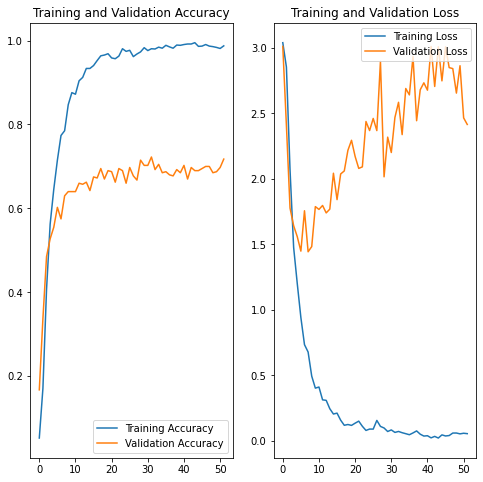

In [224]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(len(history.history['loss'])) #instead of EPOCKS

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classification illustration

In [225]:
def plot_image_color(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


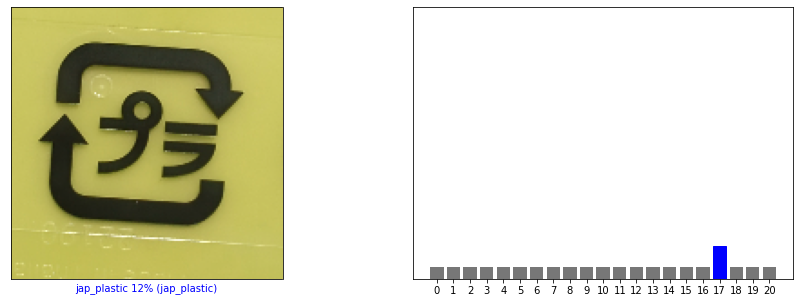

In [226]:
i = 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_image_color(i, predictions[i], y_testC, X_testC)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_testC)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


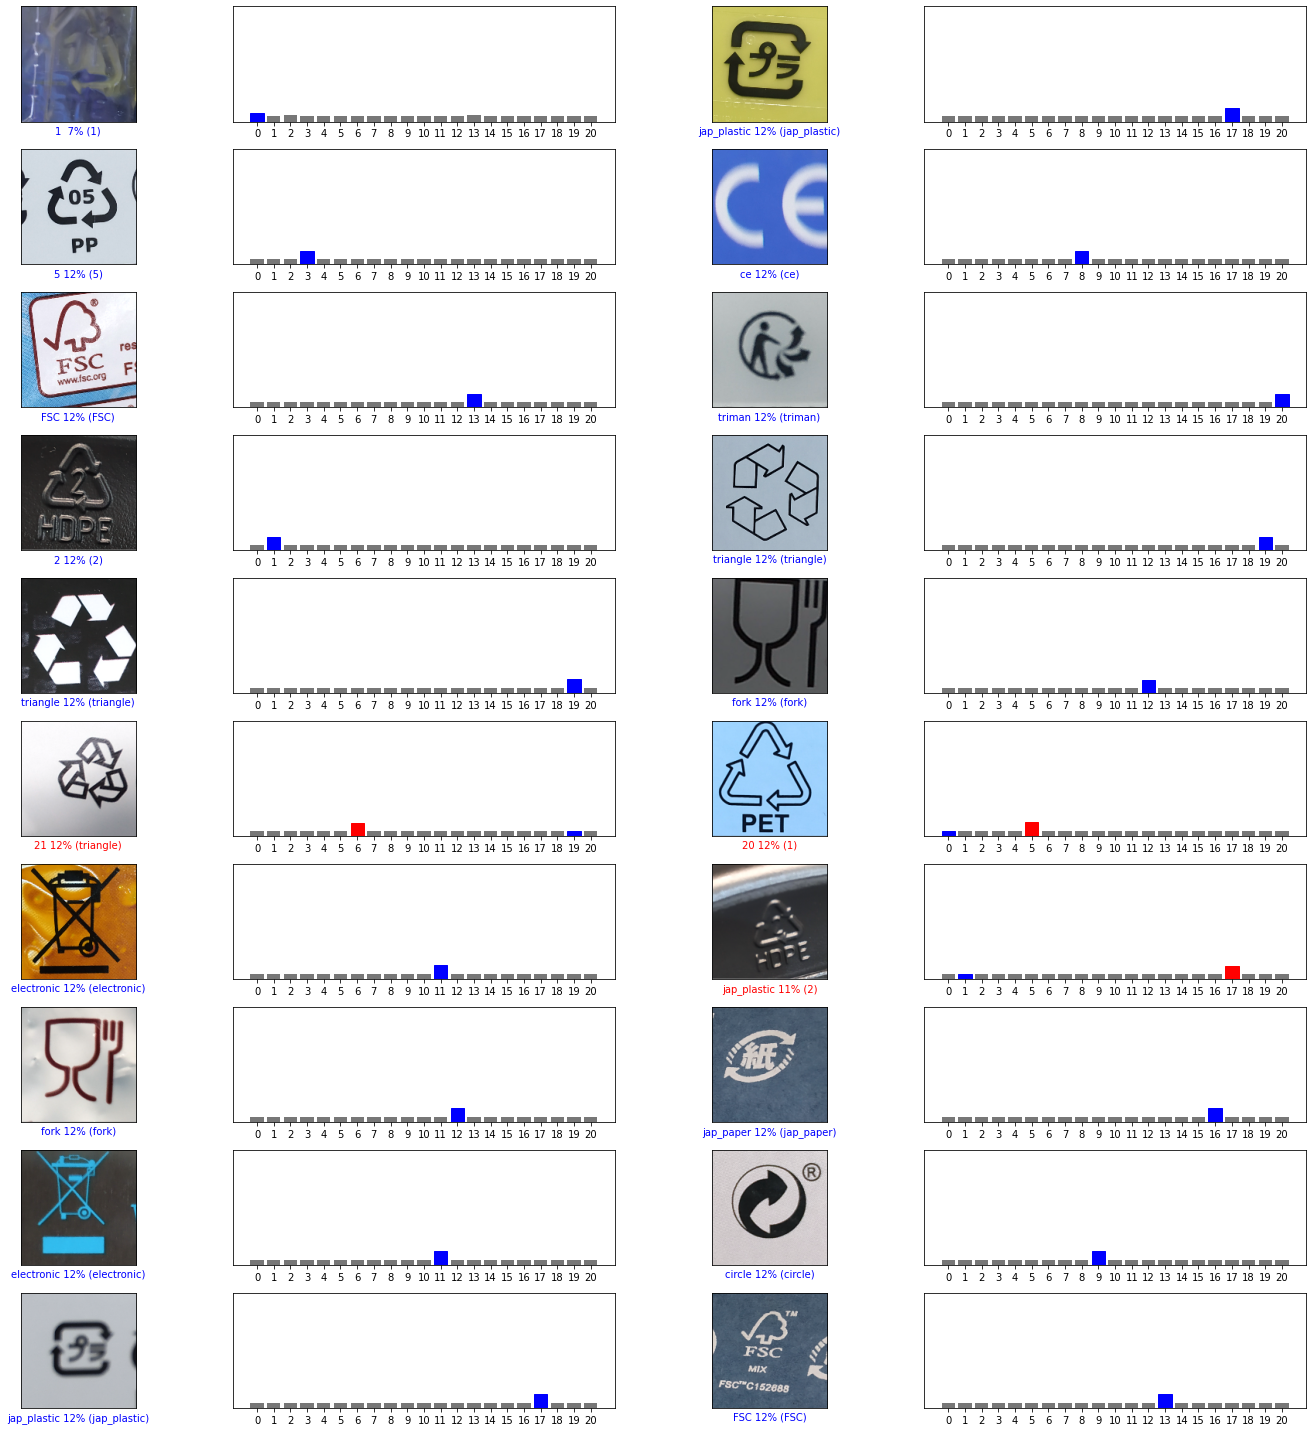

In [227]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_color(i, predictions[i], y_testC, X_testC)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_testC)
plt.tight_layout()
plt.show()

# DNN drop out+early stop Black and White pics(BEST)

In [214]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
    ])

model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [215]:
EPOCHS = 100
BATCH_SIZE = 100  
IMG_SHAPE  = 150 

earlystop_callbacks = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=20,restore_best_weights=True)

In [216]:
history = model_dropout.fit(
    X_train,y_train,
    steps_per_epoch=int(np.ceil(len(X_train) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_test,y_test),
    validation_steps=int(np.ceil(len(X_test) / float(BATCH_SIZE))),
    callbacks=[earlystop_callbacks]
)

Epoch 1/100
16/16 [==============================] - 4s 220ms/step - loss: 3.0567 - accuracy: 0.0488 - val_loss: 3.0363 - val_accuracy: 0.0325
Epoch 2/100
16/16 [==============================] - 3s 212ms/step - loss: 3.0165 - accuracy: 0.0656 - val_loss: 2.8648 - val_accuracy: 0.1325
Epoch 3/100
16/16 [==============================] - 3s 214ms/step - loss: 2.5698 - accuracy: 0.2583 - val_loss: 2.0482 - val_accuracy: 0.4050
Epoch 4/100
16/16 [==============================] - 3s 214ms/step - loss: 1.7608 - accuracy: 0.5009 - val_loss: 1.7166 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 3s 216ms/step - loss: 1.2820 - accuracy: 0.6110 - val_loss: 1.5381 - val_accuracy: 0.5650
Epoch 6/100
16/16 [==============================] - 3s 215ms/step - loss: 1.0132 - accuracy: 0.6909 - val_loss: 1.3741 - val_accuracy: 0.6275
Epoch 7/100
16/16 [==============================] - 3s 216ms/step - loss: 0.8176 - accuracy: 0.7522 - val_loss: 1.4018 - val_accuracy: 0.6275

In [217]:
test_loss, test_acc = model_dropout.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

#100 epochs with aug and dropout + early stop(patience=20,restore_best_weights=True) Black/white img gave 0.7225
#100 epochs with aug and dropout + early stop(patience=20,restore_best_weights=True) Black/white with 3rd layer(Conv2D(128) gave 0.7100

#100 epochs with aug and dropout + early stop(patience=20,restore_best_weights=True) Black/white img + normalization gave 0.7125
# Best accuracy: 0.7300

13/13 - 0s - loss: 1.9337 - accuracy: 0.7300

Test accuracy: 0.7300000190734863


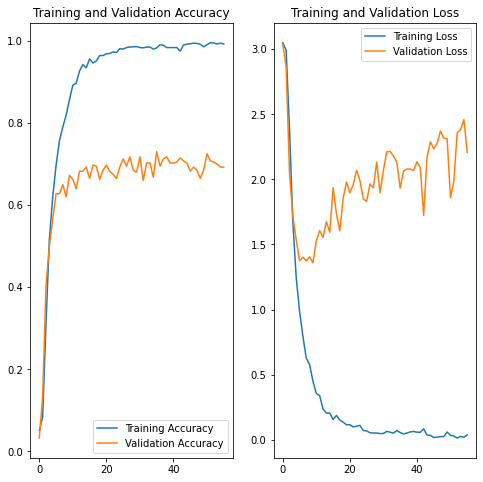

In [218]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(len(history.history['loss'])) #instead of EPOCKS

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [219]:
probability_model_dropout = tf.keras.Sequential([model_dropout, 
                                         tf.keras.layers.Softmax()])
predictions_model_dropout = probability_model_dropout.predict(X_test)
print('actual class: ',y_testC[0], 'predicted class: ',np.argmax(predictions_model_dropout[0]))

actual class:  0 predicted class:  12


### Classification illustration

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(21))
  plt.yticks([])
  thisplot = plt.bar(range(21), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [229]:
X_test2 = X_test.reshape(-1, 150, 150)
X_test2.shape

(400, 150, 150)

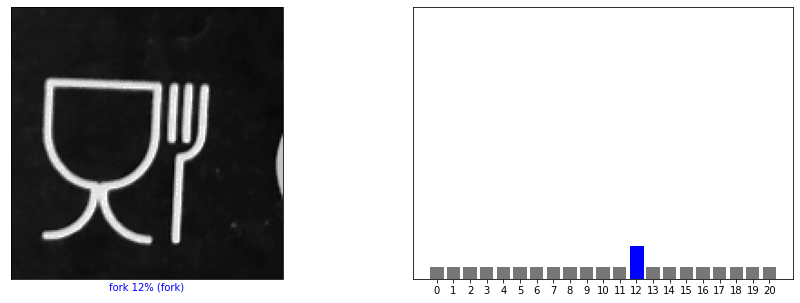

In [230]:
i = 0
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_image(i, predictions_model_dropout[i], y_test, X_test2)
plt.subplot(1,2,2)
plot_value_array(i, predictions_model_dropout[i],  y_test)
plt.show()

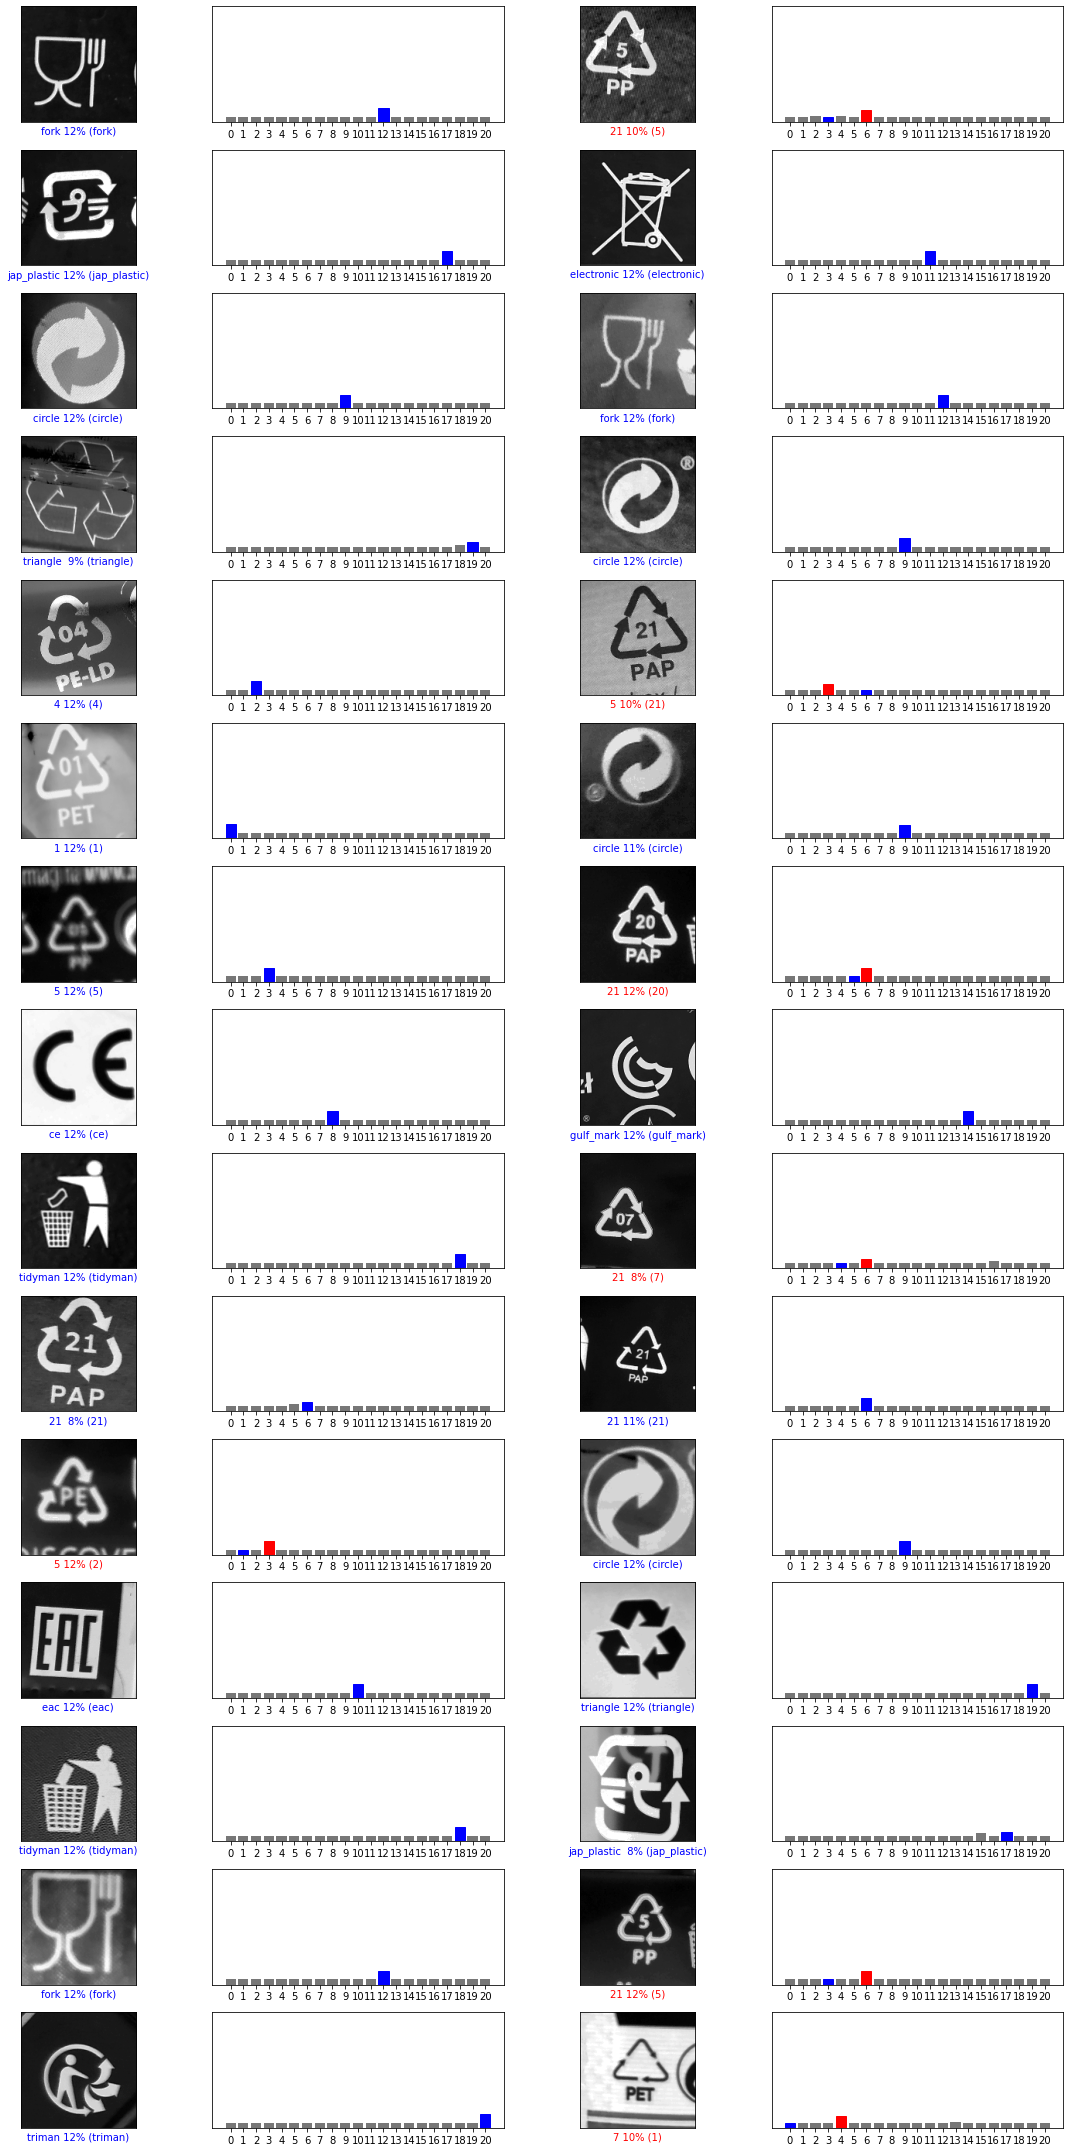

In [232]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 15
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_dropout[i], y_test, X_test2)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_dropout[i], y_test)
plt.tight_layout()
plt.show()